# Airbnb Price Prediction Model

### Import Necessary Packages

In [ ]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline
#figure % new figure window
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeCV
from math import sqrt
from yellowbrick.features import ParallelCoordinates
from yellowbrick.regressor import ResidualsPlot
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

In [148]:
#Load Data

df = pd.read_csv('sea_listings.csv')
listingdf = df

### Data Clean Up:

- Review all available columns
- Determine what are the columns are essential and drop remainder columns from the dataframe
- Drop rows that have missing information
- Remove the signs on host_response_rate & host_acceptance_rate & price & cleaning_fee columns and tunr number into float
- Remove spaces and signs that causes error when turning columns into dummies variable



In [149]:
#Droping columns that's not needed in the analysis

listingdf = listingdf.drop('listing_url', axis = 1)
listingdf = listingdf.drop('scrape_id', axis = 1)
listingdf = listingdf.drop('last_scraped', axis = 1)
listingdf = listingdf.drop('name', axis = 1)
listingdf = listingdf.drop('summary', axis = 1)
listingdf = listingdf.drop('space', axis = 1)
listingdf = listingdf.drop('description', axis = 1)
listingdf = listingdf.drop('experiences_offered', axis = 1)
listingdf = listingdf.drop('neighborhood_overview', axis = 1)
listingdf = listingdf.drop('notes', axis = 1)
listingdf = listingdf.drop('transit', axis = 1)
listingdf = listingdf.drop('thumbnail_url', axis = 1)
listingdf = listingdf.drop('medium_url', axis = 1)
listingdf = listingdf.drop('picture_url', axis = 1)
listingdf = listingdf.drop('xl_picture_url', axis = 1)
listingdf = listingdf.drop('host_id', axis = 1)
listingdf = listingdf.drop('host_url', axis = 1)
listingdf = listingdf.drop('host_name', axis = 1)
listingdf = listingdf.drop('host_since', axis = 1)
listingdf = listingdf.drop('host_location', axis = 1)
listingdf = listingdf.drop('host_about', axis = 1)
#listingdf = listingdf.drop('host_response_time, axis = 1) #maybe
listingdf = listingdf.drop('host_thumbnail_url', axis = 1)
listingdf = listingdf.drop('street', axis = 1)
listingdf = listingdf.drop('host_picture_url', axis = 1)
listingdf = listingdf.drop('host_neighbourhood', axis = 1)
listingdf = listingdf.drop('host_listings_count', axis = 1)
listingdf = listingdf.drop('host_total_listings_count', axis = 1)
listingdf = listingdf.drop('host_verifications', axis = 1)
listingdf = listingdf.drop('host_has_profile_pic', axis = 1)
listingdf = listingdf.drop('host_identity_verified', axis = 1)
listingdf = listingdf.drop('neighbourhood', axis = 1)
listingdf = listingdf.drop('neighbourhood_group_cleansed', axis = 1)
listingdf = listingdf.drop('city', axis = 1)
listingdf = listingdf.drop('state', axis = 1)
listingdf = listingdf.drop('market', axis = 1)
listingdf = listingdf.drop('country', axis = 1)
listingdf = listingdf.drop('latitude', axis = 1)
listingdf = listingdf.drop('longitude', axis = 1)
listingdf = listingdf.drop('is_location_exact', axis = 1)
listingdf = listingdf.drop('square_feet', axis = 1)
listingdf = listingdf.drop('weekly_price', axis = 1)
listingdf = listingdf.drop('monthly_price', axis = 1)
listingdf = listingdf.drop('security_deposit', axis = 1)
listingdf = listingdf.drop('calendar_updated', axis = 1)
listingdf = listingdf.drop('has_availability', axis = 1)
listingdf = listingdf.drop('availability_30', axis = 1)
listingdf = listingdf.drop('availability_60', axis = 1)
listingdf = listingdf.drop('availability_90', axis = 1)
listingdf = listingdf.drop('availability_365', axis = 1)
listingdf = listingdf.drop('calendar_last_scraped', axis = 1)
listingdf = listingdf.drop('first_review', axis = 1)
listingdf = listingdf.drop('last_review', axis = 1)
listingdf = listingdf.drop('requires_license', axis = 1)
listingdf = listingdf.drop('license', axis = 1)
listingdf = listingdf.drop('jurisdiction_names', axis = 1)
listingdf = listingdf.drop('require_guest_profile_picture', axis = 1)
listingdf = listingdf.drop('require_guest_phone_verification', axis = 1)
listingdf = listingdf.drop('calculated_host_listings_count', axis = 1)
listingdf = listingdf.drop('reviews_per_month', axis = 1)
listingdf = listingdf.drop('smart_location', axis = 1) # maybe
listingdf = listingdf.drop('zipcode', axis = 1) # maybe
listingdf = listingdf.drop('country_code', axis = 1) # maybe
listingdf = listingdf.drop('amenities', axis = 1) # to be added later
listingdf = listingdf.drop('extra_people', axis = 1) # to be added later
listingdf = listingdf.drop('id', axis = 1) 

In [300]:
#Drop rows that have missing information

listingdf = listingdf.dropna()


In [152]:
#Remove the signs on host_response_rate & host_acceptance_rate & price & cleaning_fee columns and tunr number into float

listingdf['host_response_rate'] = listingdf['host_response_rate'].str.replace('%','')
listingdf['host_response_rate'] = listingdf['host_response_rate'].astype('float')

listingdf['host_acceptance_rate'] = listingdf['host_acceptance_rate'].str.replace('%','')
listingdf['host_acceptance_rate'] = listingdf['host_acceptance_rate'].astype('float')

listingdf['price'] = listingdf['price'].str.replace('$','')
listingdf['price'] = listingdf['price'].astype('float')

listingdf['cleaning_fee'] = listingdf['cleaning_fee'].str.replace('$','')
listingdf['cleaning_fee'] = listingdf['cleaning_fee'].astype('float')


In [ ]:
# Remove spaces and signs that causes error when turning columns into dummies variable

datawithspace = ['host_response_time', 'neighbourhood_cleansed', 'bed_type', 'room_type','property_type']

for i in datawithspace:
    listingdf[i] = listingdf[i].str.replace(' ', '')
    listingdf[i] = listingdf[i].str.replace('&', '_')
    listingdf[i] = listingdf[i].str.replace('/', '_')
    listingdf[i] = listingdf[i].str.replace('-', '_')
    
datawithsign = ['room_type']

for s in datawithsign:
    listingdf[s] = listingdf[s].str.replace('/', '_')
  
columnsstrs = ['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']

for x in columnsstrs:

    listingdf[x].str.lower()

In [ ]:
#sns.pairplot(listingdf[property_type])

In [155]:
# Turn columns into dummy variables & reset index as rows were dropped previously

listingdf2 = pd.get_dummies(listingdf, columns=['instant_bookable', 'bed_type', 'room_type','property_type','host_is_superhost', 'neighbourhood_cleansed', 'host_response_time', 'cancellation_policy'])
listingdf2 = listingdf2.reset_index(drop=True)

# Move column price to the end of dataframe
listingdf2['f_price'] = listingdf2['price']
listingdf2  = listingdf2.drop(['price'], 1)

### Look at distribution of price, normalizing to normal distribution by apply log transformation

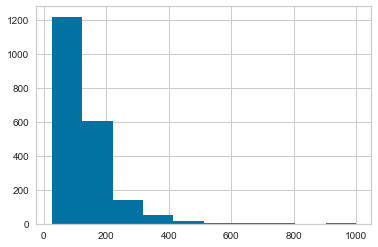

In [302]:
listingdf2.f_price.hist()

In [157]:
listingdf2['log_price'] = listingdf2['f_price']
listingdf2['log_price'] = np.log(listingdf2.log_price)


In [158]:
listingdf2['f_price'].mean()

130.1234084231146

-0.2022252223726587


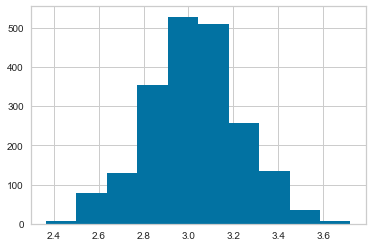

In [160]:
lamb=stats.boxcox_normmax(listingdf2.f_price, brack=(-1.9, 1.9))
print(lamb)
y_t=(np.power(listingdf2.f_price,-0.20223)-1)/-0.20223

plt.hist(y_t);

(array([ 26., 133., 319., 566., 539., 262., 126.,  54.,  11.,   6.]),
 array([3.21887582, 3.58766372, 3.95645162, 4.32523951, 4.69402741,
        5.0628153 , 5.4316032 , 5.80039109, 6.16917899, 6.53796688,
        6.90675478]),
 <a list of 10 Patch objects>)

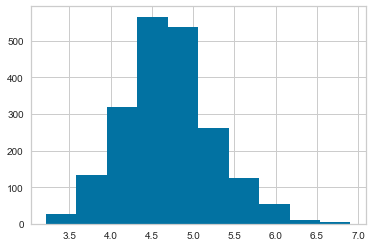

In [266]:
plt.hist(np.log(listingdf2.f_price))

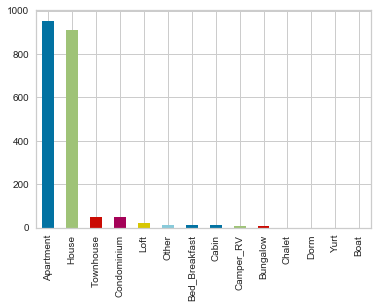

In [276]:

listingdf['property_type'].value_counts().plot(kind='bar')

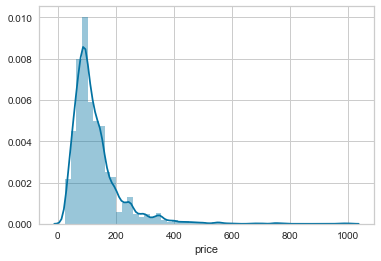

In [297]:
sns.distplot(listingdf['price'])

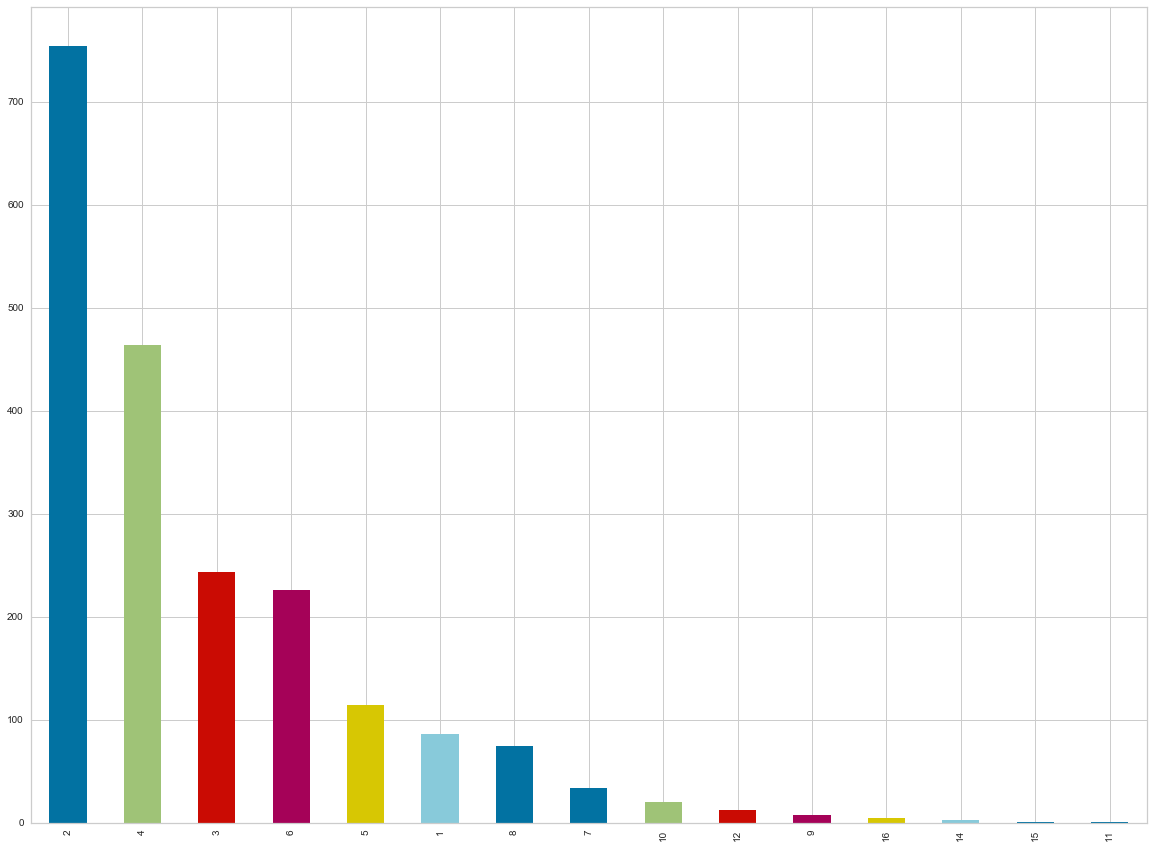

In [299]:
listingdf['accommodates'].value_counts().plot(kind='bar',figsize=(20,15))

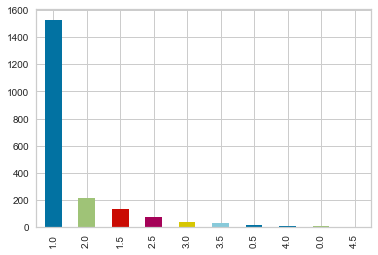

In [288]:
listingdf['bathrooms'].value_counts().plot(kind='bar')

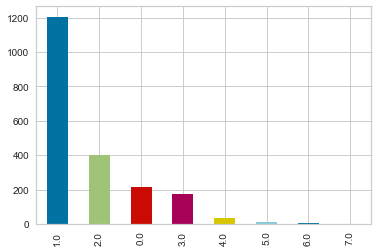

In [290]:
listingdf['bedrooms'].value_counts().plot(kind='bar')

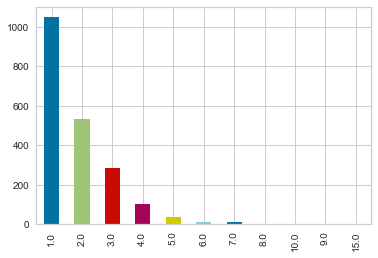

In [292]:
listingdf['beds'].value_counts().plot(kind='bar')

In [162]:
# View the correlations

listingdf2.corr()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,...,neighbourhood_cleansed_YeslerTerrace,host_response_time_afewdaysormore,host_response_time_withinaday,host_response_time_withinafewhours,host_response_time_withinanhour,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,f_price,log_price
host_response_rate,1.000000,-0.009560,0.007824,0.003128,-0.002636,0.007934,-0.057630,0.060826,0.006647,-0.093712,...,-0.045443,-0.522945,-0.348042,-0.002785,0.335559,-0.070824,0.028530,0.026525,-0.028064,-0.027812
host_acceptance_rate,-0.009560,1.000000,0.017525,0.010376,0.008363,0.015648,0.018437,0.013200,-0.000447,-0.017245,...,0.001473,0.001904,-0.055072,0.014093,0.025233,0.010154,-0.030285,0.021180,0.008931,0.006438
accommodates,0.007824,0.017525,1.000000,0.588158,0.776129,0.863926,0.672942,0.538664,0.008487,0.025940,...,-0.003114,-0.018673,0.052502,0.035830,-0.066174,-0.157123,-0.158255,0.270139,0.662136,0.678967
bathrooms,0.003128,0.010376,0.588158,1.000000,0.665838,0.566883,0.540392,0.335815,-0.002668,-0.000066,...,-0.018382,-0.010518,0.028587,0.064866,-0.077421,-0.047131,-0.116432,0.146801,0.589560,0.499638
bedrooms,-0.002636,0.008363,0.776129,0.665838,1.000000,0.754958,0.627687,0.474650,0.000928,0.005307,...,-0.025138,-0.007290,0.064339,0.057633,-0.096322,-0.120771,-0.128143,0.213841,0.643387,0.601728
beds,0.007934,0.015648,0.863926,0.566883,0.754958,1.000000,0.642882,0.467802,-0.010407,0.019655,...,-0.017025,-0.032876,0.028400,0.039623,-0.050371,-0.123905,-0.140276,0.227790,0.609165,0.588152
cleaning_fee,-0.057630,0.018437,0.672942,0.540392,0.627687,0.642882,1.000000,0.344320,0.019094,0.029633,...,-0.029986,-0.002297,0.113140,0.024729,-0.101176,-0.218682,-0.184235,0.341622,0.672466,0.677648
guests_included,0.060826,0.013200,0.538664,0.335815,0.474650,0.467802,0.344320,1.000000,-0.008992,-0.051294,...,0.002562,-0.030819,-0.035508,0.028723,0.003845,-0.124046,-0.079040,0.169495,0.426220,0.415734
minimum_nights,0.006647,-0.000447,0.008487,-0.002668,0.000928,-0.010407,0.019094,-0.008992,1.000000,0.014069,...,-0.003993,0.003548,-0.007272,0.033780,-0.026406,-0.019478,0.028581,-0.012480,0.016511,0.023064
maximum_nights,-0.093712,-0.017245,0.025940,-0.000066,0.005307,0.019655,0.029633,-0.051294,0.014069,1.000000,...,0.024768,0.044244,0.012911,-0.032988,0.013513,0.060031,-0.043927,-0.003651,0.000067,0.006087


In [163]:
# Plot all of the variable-to-variable relations as scatterplots -> takes too long to run

#sns.pairplot(listingdf2)



In [164]:
# #listingdf2.columns
# list = []
# for col in listingdf2.columns:
#     list.append(col)
    
# list = "', '".join(list)
# print(list)

In [165]:
X = listingdf2.iloc[:,:-3]
y = listingdf2.iloc[:,-1:]



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size=0.2)

In [166]:
## ALL VARIABLES

y, X = patsy.dmatrices('f_price ~ host_response_rate + host_acceptance_rate + accommodates + bathrooms + bedrooms + beds + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable_f + instant_bookable_t + bed_type_Airbed + bed_type_Couch + bed_type_Futon + bed_type_Pull_outSofa + bed_type_RealBed + room_type_Entirehome_apt + room_type_Privateroom + room_type_Sharedroom + property_type_Apartment + property_type_Bed_Breakfast + property_type_Boat + property_type_Bungalow + property_type_Cabin + property_type_Camper_RV + property_type_Chalet + property_type_Condominium + property_type_Dorm + property_type_House + property_type_Loft + property_type_Other + property_type_Townhouse + property_type_Yurt + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_is_superhost_f + host_is_superhost_t + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_response_time_afewdaysormore + host_response_time_withinaday + host_response_time_withinafewhours + host_response_time_withinanhour + cancellation_policy_flexible + cancellation_policy_moderate + cancellation_policy_strict', data=listingdf2, return_type="dataframe")

model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                f_price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     32.18
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        08:56:00   Log-Likelihood:                -10851.
No. Observations:                2042   AIC:                         2.196e+04
Df Residuals:                    1914   BIC:                         2.268e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         11.9958     19.399      0.618      0.536     -26.050      50.042
host_response_rate                                -0.1233      0.151     -0.818      0.413      -0.419       0.172
host_acceptance_rate                              -0.4240      0.530     -0.800      0.424      -1.464       0.616
accommodates                                       4.2829      1.371      3.124      0.002       1.594       6.972
bathrooms                                         27.6273      2.962      9.326      0.000      21.817      33.437
bedrooms                                          20.4522      2.494      8.200      0.000      15.560      25.344
beds                                               0.3561      2.018      0.176      0.860      -3.601       4.313
cleaning_fee                                       0.4275      0.039     10.966      0.000       0.351       0.504
guests_included                                    4.9077      1.020      4.809      0.000       2.906       6.909
minimum_nights                                     0.0167      0.051      0.327      0.743      -0.084       0.117
maximum_nights                                    -0.0039      0.002     -1.621      0.105      -0.009       0.001
number_of_reviews                                 -0.0845      0.034     -2.516      0.012      -0.150      -0.019
review_scores_rating                               1.0968      0.305      3.595      0.000       0.499       1.695
review_scores_accuracy                             0.2141      2.255      0.095      0.924      -4.208       4.636
review_scores_cleanliness                         -0.9732      2.121     -0.459      0.646      -5.134       3.187
review_scores_checkin                              2.0792      2.755      0.755      0.450      -3.323       7.482
review_scores_communication                       -1.3632      3.112     -0.438      0.661      -7.467       4.741
review_scores_location                             3.8174      2.363      1.615      0.106      -0.817       8.452
review_scores_value                               -9.0045      2.327     -3.869      0.000     -13.569      -4.440
instant_bookable_f                                 6.3881      9.853      0.648      0.517     -12.936      25.713
instant_bookable_t                                 5.6077      9.798      0.572      0.567     -13.607      24.823
bed_type_Airbed                                    1.2984     16.164      0.080      0.936     -30.402      32.999
bed_type_Couch                                     9.7288     26.275      0.370      0.711     -41.801      61.259
bed_type_Futon                                     5.6138     11.832      0.474      0.635   

In [167]:
## Train Data

# y, X = patsy.dmatrices('y_train ~ X_train', data=listingdf2, return_type="dataframe")

modeltrain = sm.OLS(y_train,X_train)
fit = modeltrain.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     40.29
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        08:56:00   Log-Likelihood:                -108.65
No. Observations:                1633   AIC:                             469.3
Df Residuals:                    1507   BIC:                             1149.
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
host_response_rate                                -0.0008      0.001     -0.838      0.402      -0.003       0.001
host_acceptance_rate                               0.0357      0.002     19.327      0.000       0.032       0.039
accommodates                                       0.0377      0.008      4.638      0.000       0.022       0.054
bathrooms                                          0.0633      0.018      3.581      0.000       0.029       0.098
bedrooms                                           0.1379      0.015      9.171      0.000       0.108       0.167
beds                                              -0.0128      0.012     -1.070      0.285      -0.036       0.011
cleaning_fee                                       0.0021      0.000      9.075      0.000       0.002       0.003
guests_included                                    0.0241      0.006      3.890      0.000       0.012       0.036
minimum_nights                                     0.0011      0.004      0.312      0.755      -0.006       0.008
maximum_nights                                  -1.14e-05   1.43e-05     -0.797      0.426   -3.95e-05    1.67e-05
number_of_reviews                                 -0.0008      0.000     -3.980      0.000      -0.001      -0.000
review_scores_rating                               0.0066      0.002      3.665      0.000       0.003       0.010
review_scores_accuracy                             0.0194      0.013      1.451      0.147      -0.007       0.046
review_scores_cleanliness                         -0.0097      0.013     -0.767      0.443      -0.034       0.015
review_scores_checkin                              0.0118      0.016      0.728      0.467      -0.020       0.044
review_scores_communication                       -0.0147      0.019     -0.787      0.432      -0.051       0.022
review_scores_location                             0.0188      0.014      1.314      0.189      -0.009       0.047
review_scores_value                               -0.0553      0.014     -3.946      0.000      -0.083      -0.028
instant_bookable_f                                 0.0078      0.009      0.819      0.413      -0.011       0.026
instant_bookable_t                                -0.0074      0.009     -0.781      0.435      -0.026       0.011
bed_type_Airbed                                    0.0622      0.097      0.643      0.521      -0.128       0.252
bed_type_Couch                                    -0.1445      0.169     -0.855      0.393      -0.476       0.187
bed_type_Futon                                     0.0420      0.074      0.567      0.571      -0.103       0.188
bed_type_Pull_outSofa                             -0.0244      0.070     -0.349      0.727   

In [168]:
## Test Data - setting baseline

modeltest = sm.OLS(y_test,X_test)
fit = modeltest.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     11.53
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           7.46e-63
Time:                        08:56:00   Log-Likelihood:                -3.3319
No. Observations:                 409   AIC:                             220.7
Df Residuals:                     302   BIC:                             650.1
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
host_response_rate                                -0.0004      0.002     -0.180      0.857      -0.005       0.004
host_acceptance_rate                              -0.0068      0.004     -1.809      0.071      -0.014       0.001
accommodates                                       0.0310      0.020      1.563      0.119      -0.008       0.070
bathrooms                                          0.1610      0.041      3.887      0.000       0.079       0.243
bedrooms                                           0.1068      0.034      3.127      0.002       0.040       0.174
beds                                               0.0083      0.029      0.286      0.775      -0.049       0.065
cleaning_fee                                       0.0014      0.001      2.605      0.010       0.000       0.003
guests_included                                    0.0207      0.014      1.517      0.130      -0.006       0.048
minimum_nights                                  7.275e-05      0.000      0.244      0.807      -0.001       0.001
maximum_nights                                 -6.457e-05    3.4e-05     -1.898      0.059      -0.000    2.37e-06
number_of_reviews                                 -0.0002      0.001     -0.470      0.639      -0.001       0.001
review_scores_rating                               0.0076      0.005      1.684      0.093      -0.001       0.017
review_scores_accuracy                            -0.0193      0.031     -0.618      0.537      -0.081       0.042
review_scores_cleanliness                         -0.0046      0.032     -0.144      0.885      -0.067       0.058
review_scores_checkin                             -0.0115      0.040     -0.287      0.775      -0.091       0.068
review_scores_communication                        0.0199      0.042      0.474      0.636      -0.063       0.102
review_scores_location                             0.0292      0.033      0.898      0.370      -0.035       0.093
review_scores_value                               -0.1113      0.033     -3.409      0.001      -0.176      -0.047
instant_bookable_f                                 1.2672      0.155      8.167      0.000       0.962       1.573
instant_bookable_t                                 1.2490      0.153      8.141      0.000       0.947       1.551
bed_type_Airbed                                    0.4916      0.208      2.358      0.019       0.081       0.902
bed_type_Couch                                     0.4455      0.277      1.610      0.108      -0.099       0.990
bed_type_Futon                                     0.5882      0.138      4.249      0.000       0.316       0.861
bed_type_Pull_outSofa                              0.2821      0.170      1.659      0.098   

In [169]:
fit.params

host_response_rate                          -0.000379
host_acceptance_rate                        -0.006780
accommodates                                 0.031030
bathrooms                                    0.161000
bedrooms                                     0.106767
beds                                         0.008288
cleaning_fee                                 0.001426
guests_included                              0.020733
minimum_nights                               0.000073
maximum_nights                              -0.000065
number_of_reviews                           -0.000236
review_scores_rating                         0.007642
review_scores_accuracy                      -0.019289
review_scores_cleanliness                   -0.004592
review_scores_checkin                       -0.011518
review_scores_communication                  0.019898
review_scores_location                       0.029209
review_scores_value                         -0.111287
instant_bookable_f          

In [170]:
## ALL VARIABLES -> after f_price powertransformation

y, X = patsy.dmatrices('y_t ~ host_response_rate + host_acceptance_rate + accommodates + bathrooms + bedrooms + beds + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable_f + instant_bookable_t + bed_type_Airbed + bed_type_Couch + bed_type_Futon + bed_type_Pull_outSofa + bed_type_RealBed + room_type_Entirehome_apt + room_type_Privateroom + room_type_Sharedroom + property_type_Apartment + property_type_Bed_Breakfast + property_type_Boat + property_type_Bungalow + property_type_Cabin + property_type_Camper_RV + property_type_Chalet + property_type_Condominium + property_type_Dorm + property_type_House + property_type_Loft + property_type_Other + property_type_Townhouse + property_type_Yurt + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_is_superhost_f + host_is_superhost_t + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_response_time_afewdaysormore + host_response_time_withinaday + host_response_time_withinafewhours + host_response_time_withinanhour + cancellation_policy_flexible + cancellation_policy_moderate + cancellation_policy_strict', data=listingdf2, return_type="dataframe")

model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     48.13
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        08:56:01   Log-Likelihood:                 1787.5
No. Observations:                2042   AIC:                            -3319.
Df Residuals:                    1914   BIC:                            -2599.
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          0.9196      0.040     23.110      0.000       0.842       0.998
host_response_rate                                -0.0003      0.000     -0.904      0.366      -0.001       0.000
host_acceptance_rate                              -0.0031      0.001     -2.849      0.004      -0.005      -0.001
accommodates                                       0.0150      0.003      5.341      0.000       0.010       0.021
bathrooms                                          0.0223      0.006      3.678      0.000       0.010       0.034
bedrooms                                           0.0497      0.005      9.715      0.000       0.040       0.060
beds                                              -0.0055      0.004     -1.321      0.187      -0.014       0.003
cleaning_fee                                       0.0007      8e-05      8.989      0.000       0.001       0.001
guests_included                                    0.0082      0.002      3.938      0.000       0.004       0.012
minimum_nights                                  5.465e-05      0.000      0.521      0.602      -0.000       0.000
maximum_nights                                  -7.16e-06   4.91e-06     -1.458      0.145   -1.68e-05    2.47e-06
number_of_reviews                                 -0.0002   6.89e-05     -3.611      0.000      -0.000      -0.000
review_scores_rating                               0.0025      0.001      3.987      0.000       0.001       0.004
review_scores_accuracy                             0.0036      0.005      0.770      0.442      -0.006       0.013
review_scores_cleanliness                         -0.0004      0.004     -0.102      0.919      -0.009       0.008
review_scores_checkin                              0.0016      0.006      0.277      0.782      -0.010       0.013
review_scores_communication                       -0.0014      0.006     -0.220      0.826      -0.014       0.011
review_scores_location                             0.0072      0.005      1.484      0.138      -0.002       0.017
review_scores_value                               -0.0254      0.005     -5.311      0.000      -0.035      -0.016
instant_bookable_f                                 0.4656      0.020     23.035      0.000       0.426       0.505
instant_bookable_t                                 0.4540      0.020     22.593      0.000       0.415       0.493
bed_type_Airbed                                    0.2003      0.033      6.042      0.000       0.135       0.265
bed_type_Couch                                     0.1348      0.054      2.501      0.012       0.029       0.240
bed_type_Futon                                     0.1973      0.024      8.132      0.000   

In [171]:
## ALL VARIABLES -> after log price powertransformation

y, X = patsy.dmatrices('log_price ~ host_response_rate + host_acceptance_rate + accommodates + bathrooms + bedrooms + beds + cleaning_fee + guests_included + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable_f + instant_bookable_t + bed_type_Airbed + bed_type_Couch + bed_type_Futon + bed_type_Pull_outSofa + bed_type_RealBed + room_type_Entirehome_apt + room_type_Privateroom + room_type_Sharedroom + property_type_Apartment + property_type_Bed_Breakfast + property_type_Boat + property_type_Bungalow + property_type_Cabin + property_type_Camper_RV + property_type_Chalet + property_type_Condominium + property_type_Dorm + property_type_House + property_type_Loft + property_type_Other + property_type_Townhouse + property_type_Yurt + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_is_superhost_f + host_is_superhost_t + neighbourhood_cleansed_Adams + neighbourhood_cleansed_Alki + neighbourhood_cleansed_ArborHeights + neighbourhood_cleansed_Atlantic + neighbourhood_cleansed_Belltown + neighbourhood_cleansed_BitterLake + neighbourhood_cleansed_Briarcliff + neighbourhood_cleansed_Brighton + neighbourhood_cleansed_Broadview + neighbourhood_cleansed_Broadway + neighbourhood_cleansed_Bryant + neighbourhood_cleansed_CedarPark + neighbourhood_cleansed_CentralBusinessDistrict + neighbourhood_cleansed_ColumbiaCity + neighbourhood_cleansed_CrownHill + neighbourhood_cleansed_Dunlap + neighbourhood_cleansed_EastQueenAnne + neighbourhood_cleansed_Eastlake + neighbourhood_cleansed_FairmountPark + neighbourhood_cleansed_Fauntleroy + neighbourhood_cleansed_FirstHill + neighbourhood_cleansed_Fremont + neighbourhood_cleansed_Gatewood + neighbourhood_cleansed_Genesee + neighbourhood_cleansed_Georgetown + neighbourhood_cleansed_GreenLake + neighbourhood_cleansed_Greenwood + neighbourhood_cleansed_HallerLake + neighbourhood_cleansed_Harrison_Denny_Blaine + neighbourhood_cleansed_HighPoint + neighbourhood_cleansed_HighlandPark + neighbourhood_cleansed_Interbay + neighbourhood_cleansed_InternationalDistrict + neighbourhood_cleansed_Laurelhurst + neighbourhood_cleansed_LawtonPark + neighbourhood_cleansed_Leschi + neighbourhood_cleansed_LowerQueenAnne + neighbourhood_cleansed_LoyalHeights + neighbourhood_cleansed_MadisonPark + neighbourhood_cleansed_Madrona + neighbourhood_cleansed_Mann + neighbourhood_cleansed_MapleLeaf + neighbourhood_cleansed_MatthewsBeach + neighbourhood_cleansed_Meadowbrook + neighbourhood_cleansed_Mid_BeaconHill + neighbourhood_cleansed_Minor + neighbourhood_cleansed_Montlake + neighbourhood_cleansed_MountBaker + neighbourhood_cleansed_NorthAdmiral + neighbourhood_cleansed_NorthBeach_BlueRidge + neighbourhood_cleansed_NorthBeaconHill + neighbourhood_cleansed_NorthCollegePark + neighbourhood_cleansed_NorthDelridge + neighbourhood_cleansed_NorthQueenAnne + neighbourhood_cleansed_OlympicHills + neighbourhood_cleansed_PhinneyRidge + neighbourhood_cleansed_Pike_Market + neighbourhood_cleansed_Pinehurst + neighbourhood_cleansed_PioneerSquare + neighbourhood_cleansed_PortageBay + neighbourhood_cleansed_RainierBeach + neighbourhood_cleansed_Ravenna + neighbourhood_cleansed_Riverview + neighbourhood_cleansed_Roosevelt + neighbourhood_cleansed_Seaview + neighbourhood_cleansed_SewardPark + neighbourhood_cleansed_SouthBeaconHill + neighbourhood_cleansed_SouthDelridge + neighbourhood_cleansed_SouthLakeUnion + neighbourhood_cleansed_SouthPark + neighbourhood_cleansed_SoutheastMagnolia + neighbourhood_cleansed_Stevens + neighbourhood_cleansed_SunsetHill + neighbourhood_cleansed_UniversityDistrict + neighbourhood_cleansed_VictoryHeights + neighbourhood_cleansed_ViewRidge + neighbourhood_cleansed_Wallingford + neighbourhood_cleansed_Wedgwood + neighbourhood_cleansed_WestQueenAnne + neighbourhood_cleansed_WestWoodland + neighbourhood_cleansed_Westlake + neighbourhood_cleansed_WhittierHeights + neighbourhood_cleansed_Windermere + neighbourhood_cleansed_YeslerTerrace + host_response_time_afewdaysormore + host_response_time_withinaday + host_response_time_withinafewhours + host_response_time_withinanhour + cancellation_policy_flexible + cancellation_policy_moderate + cancellation_policy_strict', data=listingdf2, return_type="dataframe")
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     48.70
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        08:56:01   Log-Likelihood:                -169.15
No. Observations:                2042   AIC:                             594.3
Df Residuals:                    1914   BIC:                             1314.
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          1.3748      0.104     13.253      0.000       1.171       1.578
host_response_rate                                -0.0007      0.001     -0.824      0.410      -0.002       0.001
host_acceptance_rate                              -0.0071      0.003     -2.511      0.012      -0.013      -0.002
accommodates                                       0.0378      0.007      5.162      0.000       0.023       0.052
bathrooms                                          0.0789      0.016      4.980      0.000       0.048       0.110
bedrooms                                           0.1359      0.013     10.191      0.000       0.110       0.162
beds                                              -0.0119      0.011     -1.106      0.269      -0.033       0.009
cleaning_fee                                       0.0020      0.000      9.706      0.000       0.002       0.002
guests_included                                    0.0225      0.005      4.131      0.000       0.012       0.033
minimum_nights                                     0.0001      0.000      0.544      0.586      -0.000       0.001
maximum_nights                                 -1.884e-05   1.28e-05     -1.472      0.141   -4.39e-05    6.26e-06
number_of_reviews                                 -0.0007      0.000     -3.744      0.000      -0.001      -0.000
review_scores_rating                               0.0068      0.002      4.167      0.000       0.004       0.010
review_scores_accuracy                             0.0085      0.012      0.708      0.479      -0.015       0.032
review_scores_cleanliness                         -0.0026      0.011     -0.226      0.821      -0.025       0.020
review_scores_checkin                              0.0060      0.015      0.410      0.682      -0.023       0.035
review_scores_communication                       -0.0052      0.017     -0.314      0.754      -0.038       0.027
review_scores_location                             0.0200      0.013      1.579      0.114      -0.005       0.045
review_scores_value                               -0.0664      0.012     -5.331      0.000      -0.091      -0.042
instant_bookable_f                                 0.6997      0.053     13.280      0.000       0.596       0.803
instant_bookable_t                                 0.6751      0.052     12.885      0.000       0.572       0.778
bed_type_Airbed                                    0.3075      0.086      3.558      0.000       0.138       0.477
bed_type_Couch                                     0.1898      0.141      1.351      0.177      -0.086       0.465
bed_type_Futon                                     0.3047      0.063      4.816      0.000   

In [172]:
fit.params

Intercept                                    1.374763
host_response_rate                          -0.000664
host_acceptance_rate                        -0.007118
accommodates                                 0.037843
bathrooms                                    0.078889
bedrooms                                     0.135918
beds                                        -0.011935
cleaning_fee                                 0.002023
guests_included                              0.022543
minimum_nights                               0.000149
maximum_nights                              -0.000019
number_of_reviews                           -0.000672
review_scores_rating                         0.006797
review_scores_accuracy                       0.008535
review_scores_cleanliness                   -0.002561
review_scores_checkin                        0.006032
review_scores_communication                 -0.005218
review_scores_location                       0.019956
review_scores_value         

In [173]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05


fill = {'colname':listingdf2.columns[:-2], 'coefval':fit.params[1:], 'pval':fit.pvalues[1:]}
coefdf = pd.DataFrame.from_dict(fill, orient='index').T
coefdf

,colname,coefval,pval
0,host_response_rate,-0.000663583,0.410294
1,host_acceptance_rate,-0.00711829,0.0121171
2,accommodates,0.0378431,2.69849e-07
3,bathrooms,0.0788894,6.93141e-07
4,bedrooms,0.135918,8.74095e-24
5,beds,-0.0119345,0.268805
6,cleaning_fee,0.00202324,8.91747e-22
7,guests_included,0.0225433,3.76133e-05
8,minimum_nights,0.000148795,0.586284
9,maximum_nights,-1.88427e-05,0.141131


In [174]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

newcoef = coefdf[coefdf.pval < 0.05]
names = pd.Series(newcoef['colname']).values

list = []
for i in names:
    list.append(i)

list = "', '".join(list)
print(list)


host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_value', 'instant_bookable_f', 'instant_bookable_t', 'bed_type_Airbed', 'bed_type_Futon', 'bed_type_Pull_outSofa', 'bed_type_RealBed', 'room_type_Entirehome_apt', 'room_type_Privateroom', 'room_type_Sharedroom', 'property_type_Boat', 'property_type_Loft', 'neighbourhood_cleansed_ArborHeights', 'neighbourhood_cleansed_Atlantic', 'neighbourhood_cleansed_BitterLake', 'neighbourhood_cleansed_Briarcliff', 'neighbourhood_cleansed_Brighton', 'neighbourhood_cleansed_Bryant', 'neighbourhood_cleansed_CedarPark', 'neighbourhood_cleansed_ColumbiaCity', 'neighbourhood_cleansed_CrownHill', 'neighbourhood_cleansed_FairmountPark', 'neighbourhood_cleansed_Fauntleroy', 'neighbourhood_cleansed_HallerLake', 'neighbourhood_cleansed_HighlandPark', 'neighbourhood_cleansed_LawtonPark', 'neighbourhood_cleansed_LowerQueenAnne', 'neighbourhood_cleansed_Matt

In [175]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

subdrop = ['log_price', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_value', 'instant_bookable_f', 'instant_bookable_t', 'bed_type_Airbed', 'bed_type_Futon', 'bed_type_Pull_outSofa', 'bed_type_RealBed', 'room_type_Entirehome_apt', 'room_type_Privateroom', 'room_type_Sharedroom', 'property_type_Boat', 'property_type_Loft', 'neighbourhood_cleansed_ArborHeights', 'neighbourhood_cleansed_Atlantic', 'neighbourhood_cleansed_BitterLake', 'neighbourhood_cleansed_Briarcliff', 'neighbourhood_cleansed_Brighton', 'neighbourhood_cleansed_Bryant', 'neighbourhood_cleansed_CedarPark', 'neighbourhood_cleansed_ColumbiaCity', 'neighbourhood_cleansed_CrownHill', 'neighbourhood_cleansed_FairmountPark', 'neighbourhood_cleansed_Fauntleroy', 'neighbourhood_cleansed_HallerLake', 'neighbourhood_cleansed_HighlandPark', 'neighbourhood_cleansed_LawtonPark', 'neighbourhood_cleansed_LowerQueenAnne', 'neighbourhood_cleansed_MatthewsBeach', 'neighbourhood_cleansed_Meadowbrook', 'neighbourhood_cleansed_Montlake', 'neighbourhood_cleansed_NorthBeaconHill', 'neighbourhood_cleansed_NorthQueenAnne', 'neighbourhood_cleansed_OlympicHills', 'neighbourhood_cleansed_Pike_Market', 'neighbourhood_cleansed_Pinehurst', 'neighbourhood_cleansed_PioneerSquare', 'neighbourhood_cleansed_PortageBay', 'neighbourhood_cleansed_SouthBeaconHill', 'neighbourhood_cleansed_SouthLakeUnion', 'neighbourhood_cleansed_SouthPark', 'neighbourhood_cleansed_SoutheastMagnolia', 'neighbourhood_cleansed_Stevens', 'neighbourhood_cleansed_SunsetHill', 'neighbourhood_cleansed_Wallingford', 'neighbourhood_cleansed_WhittierHeights', 'neighbourhood_cleansed_Windermere', 'neighbourhood_cleansed_YeslerTerrace', 'host_response_time_afewdaysormore', 'host_response_time_withinaday', 'host_response_time_withinafewhours', 'host_response_time_withinanhour', 'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict']

listingdfdropp = listingdf2[subdrop]
X5 = listingdfdropp.iloc[:,1:]
y5 = listingdfdropp.iloc[:,:1]

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state = 123, test_size=0.3)

In [176]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

model = sm.OLS(y5,X5)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     84.21
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        08:56:01   Log-Likelihood:                -373.81
No. Observations:                2042   AIC:                             865.6
Df Residuals:                    1983   BIC:                             1197.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
host_acceptance_rate                        -0.0072      0.003     -2.338      0.019      -0.013      -0.001
accommodates                                 0.0317      0.006      5.140      0.000       0.020       0.044
bathrooms                                    0.0993      0.016      6.059      0.000       0.067       0.131
bedrooms                                     0.1038      0.013      7.794      0.000       0.078       0.130
cleaning_fee                                 0.0025      0.000     11.582      0.000       0.002       0.003
guests_included                              0.0198      0.006      3.454      0.001       0.009       0.031
number_of_reviews                           -0.0003      0.000     -1.607      0.108      -0.001    6.37e-05
review_scores_rating                         0.0117      0.001      8.153      0.000       0.009       0.014
review_scores_value                         -0.0696      0.013     -5.550      0.000      -0.094      -0.045
instant_bookable_f                           1.4181      0.133     10.701      0.000       1.158       1.678
instant_bookable_t                           1.3840      0.132     10.489      0.000       1.125       1.643
bed_type_Airbed                              0.1657      0.202      0.819      0.413      -0.231       0.562
bed_type_Futon                               0.2097      0.187      1.119      0.263      -0.158       0.577
bed_type_Pull_outSofa                        0.1422      0.188      0.754      0.451      -0.228       0.512
bed_type_RealBed                             0.2325      0.178      1.303      0.193      -0.117       0.582
room_type_Entirehome_apt                     1.3183      0.093     14.163      0.000       1.136       1.501
room_type_Privateroom                        0.8992      0.093      9.648      0.000       0.716       1.082
room_type_Sharedroom                         0.5846      0.087      6.748      0.000       0.415       0.754
property_type_Boat                           0.8157      0.298      2.739      0.006       0.232       1.400
property_type_Loft                           0.2215      0.065      3.430      0.001       0.095       0.348
neighbourhood_cleansed_ArborHeights         -0.1660      0.209     -0.794      0.428      -0.576       0.244
neighbourhood_cleansed_Atlantic             -0.0821      0.059     -1.399      0.162      -0.197       0.033
neighbourhood_cleansed_BitterLake           -0.4426      0.112     -3.954      0.000      -0.662      -0.223
neighbourhood_cleansed_Briarcliff           -0.0219      0.101     -0.217      0.828      -0.220       0.176
neighbourhood_cleansed_Brighton             -0.3098      0.094     -3.289      0.001      -0.495      -0.125
neighbourhood_cleansed_Bryant  

In [192]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

##### ElasticNet

degree = 1

est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV(cv=5))
est.fit(X5_train, y5_train)
ypredict = est.predict(X5_test)

mae = mean_absolute_error(ypredict, y5_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdfdropp.log_price.mean())

print(np.exp(rmse))
print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y5_test))
print(est.named_steps.elasticnetcv)

1.6645786270730052
0.25966363803296033
0.5095720145700314
0.10816298110040318
0.3444188896185677
ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)


In [204]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

##### ElasticNet


est = make_pipeline(StandardScaler(), ElasticNetCV(cv=5))


est.fit(X5_train, y5_train)
ypredict = est.predict(X5_test)

mae = mean_absolute_error(ypredict, y5_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdfdropp.log_price.mean())

print(np.exp(rmse))
print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y5_test))


1.6368184716175553
0.24280690005264385
0.49275440135288884
0.10459323408026008
0.5166411396098982


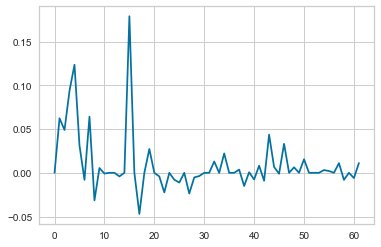

In [206]:
a= est.named_steps.elasticnetcv.coef_
plt.plot(a)

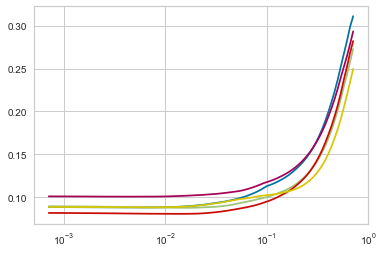

In [208]:

plt.plot(est.named_steps.elasticnetcv.alphas_, est.named_steps.elasticnetcv.mse_path_)
plt.xscale('log')

62

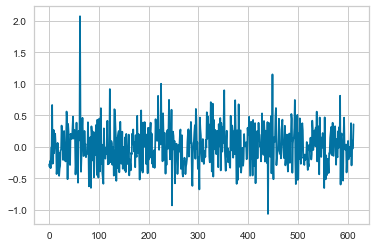

In [219]:
y5_test.shape
#X5_test.shape

resid = np.array(y5_test).ravel() - est.predict(X5_test)
plt.plot(resid)


np.argmax(resid)
np.argsort()

In [178]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

newcoef = coefdf
names = pd.Series(newcoef['colname']).values

list = []
for i in names:
    list.append(i)

list = "', '".join(list)
print(list)

host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable_f', 'instant_bookable_t', 'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull_outSofa', 'bed_type_RealBed', 'room_type_Entirehome_apt', 'room_type_Privateroom', 'room_type_Sharedroom', 'property_type_Apartment', 'property_type_Bed_Breakfast', 'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper_RV', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_House', 'property_type_Loft', 'property_type_Other', 'property_type_Townhouse', 'property_type_Yurt', 'host_is_superhost_f', 'host_is_superhost_t', 'neighbourhood_

In [233]:
## ALL VARIABLES -> after log price powertransformation -> drop columns based on review 


#'host_acceptance_rate', 'minimum_nights', 'maximum_nights',
subdrop = ['log_price','host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'review_scores_location', 'review_scores_value', 'instant_bookable_f', 'instant_bookable_t', 'room_type_Entirehome_apt', 'room_type_Privateroom', 'room_type_Sharedroom', 'property_type_Apartment', 'property_type_Bed_Breakfast', 'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper_RV', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_House', 'property_type_Loft', 'property_type_Other', 'property_type_Townhouse', 'property_type_Yurt', 'host_is_superhost_f', 'host_is_superhost_t', 'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict','neighbourhood_cleansed_Adams', 'neighbourhood_cleansed_Alki', 'neighbourhood_cleansed_ArborHeights', 'neighbourhood_cleansed_Atlantic', 'neighbourhood_cleansed_Belltown', 'neighbourhood_cleansed_BitterLake', 'neighbourhood_cleansed_Briarcliff', 'neighbourhood_cleansed_Brighton', 'neighbourhood_cleansed_Broadview', 'neighbourhood_cleansed_Broadway', 'neighbourhood_cleansed_Bryant', 'neighbourhood_cleansed_CedarPark', 'neighbourhood_cleansed_CentralBusinessDistrict', 'neighbourhood_cleansed_ColumbiaCity', 'neighbourhood_cleansed_CrownHill', 'neighbourhood_cleansed_Dunlap', 'neighbourhood_cleansed_EastQueenAnne', 'neighbourhood_cleansed_Eastlake', 'neighbourhood_cleansed_FairmountPark', 'neighbourhood_cleansed_Fauntleroy', 'neighbourhood_cleansed_FirstHill', 'neighbourhood_cleansed_Fremont', 'neighbourhood_cleansed_Gatewood', 'neighbourhood_cleansed_Genesee', 'neighbourhood_cleansed_Georgetown', 'neighbourhood_cleansed_GreenLake', 'neighbourhood_cleansed_Greenwood', 'neighbourhood_cleansed_HallerLake', 'neighbourhood_cleansed_Harrison_Denny_Blaine', 'neighbourhood_cleansed_HighPoint', 'neighbourhood_cleansed_HighlandPark', 'neighbourhood_cleansed_Interbay', 'neighbourhood_cleansed_InternationalDistrict', 'neighbourhood_cleansed_Laurelhurst', 'neighbourhood_cleansed_LawtonPark', 'neighbourhood_cleansed_Leschi', 'neighbourhood_cleansed_LowerQueenAnne', 'neighbourhood_cleansed_LoyalHeights', 'neighbourhood_cleansed_MadisonPark', 'neighbourhood_cleansed_Madrona', 'neighbourhood_cleansed_Mann', 'neighbourhood_cleansed_MapleLeaf', 'neighbourhood_cleansed_MatthewsBeach', 'neighbourhood_cleansed_Meadowbrook', 'neighbourhood_cleansed_Mid_BeaconHill', 'neighbourhood_cleansed_Minor', 'neighbourhood_cleansed_Montlake', 'neighbourhood_cleansed_MountBaker', 'neighbourhood_cleansed_NorthAdmiral', 'neighbourhood_cleansed_NorthBeach_BlueRidge', 'neighbourhood_cleansed_NorthBeaconHill', 'neighbourhood_cleansed_NorthCollegePark', 'neighbourhood_cleansed_NorthDelridge', 'neighbourhood_cleansed_NorthQueenAnne', 'neighbourhood_cleansed_OlympicHills', 'neighbourhood_cleansed_PhinneyRidge', 'neighbourhood_cleansed_Pike_Market', 'neighbourhood_cleansed_Pinehurst', 'neighbourhood_cleansed_PioneerSquare', 'neighbourhood_cleansed_PortageBay', 'neighbourhood_cleansed_RainierBeach', 'neighbourhood_cleansed_Ravenna', 'neighbourhood_cleansed_Riverview', 'neighbourhood_cleansed_Roosevelt', 'neighbourhood_cleansed_Seaview', 'neighbourhood_cleansed_SewardPark', 'neighbourhood_cleansed_SouthBeaconHill', 'neighbourhood_cleansed_SouthDelridge', 'neighbourhood_cleansed_SouthLakeUnion', 'neighbourhood_cleansed_SouthPark', 'neighbourhood_cleansed_SoutheastMagnolia', 'neighbourhood_cleansed_Stevens', 'neighbourhood_cleansed_SunsetHill', 'neighbourhood_cleansed_UniversityDistrict', 'neighbourhood_cleansed_VictoryHeights', 'neighbourhood_cleansed_ViewRidge', 'neighbourhood_cleansed_Wallingford', 'neighbourhood_cleansed_Wedgwood', 'neighbourhood_cleansed_WestQueenAnne', 'neighbourhood_cleansed_WestWoodland', 'neighbourhood_cleansed_Westlake', 'neighbourhood_cleansed_WhittierHeights', 'neighbourhood_cleansed_Windermere', 'neighbourhood_cleansed_YeslerTerrace']           
           
listingdfreview = listingdf2[subdrop]
X6 = listingdfreview.iloc[:,1:]
y6 = listingdfreview.iloc[:,:1]

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state = 123, test_size=0.2)

In [235]:
model = sm.OLS(y6,X6)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     51.27
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:37:25   Log-Likelihood:                -247.01
No. Observations:                2042   AIC:                             716.0
Df Residuals:                    1931   BIC:                             1340.
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
host_response_rate                                -0.0021      0.001     -3.304      0.001      -0.003      -0.001
accommodates                                       0.0495      0.006      8.661      0.000       0.038       0.061
bathrooms                                          0.1110      0.016      6.970      0.000       0.080       0.142
bedrooms                                           0.1640      0.013     12.452      0.000       0.138       0.190
number_of_reviews                                 -0.0008      0.000     -4.621      0.000      -0.001      -0.000
review_scores_rating                               0.0078      0.001      5.525      0.000       0.005       0.011
review_scores_location                             0.0153      0.013      1.180      0.238      -0.010       0.041
review_scores_value                               -0.0734      0.013     -5.863      0.000      -0.098      -0.049
instant_bookable_f                                 1.1285      0.043     26.541      0.000       1.045       1.212
instant_bookable_t                                 1.0797      0.044     24.335      0.000       0.993       1.167
room_type_Entirehome_apt                           1.1582      0.033     34.681      0.000       1.093       1.224
room_type_Privateroom                              0.7052      0.033     21.427      0.000       0.641       0.770
room_type_Sharedroom                               0.3447      0.041      8.351      0.000       0.264       0.426
property_type_Apartment                            0.0952      0.046      2.052      0.040       0.004       0.186
property_type_Bed_Breakfast                        0.1695      0.090      1.885      0.060      -0.007       0.346
property_type_Boat                                 0.9352      0.326      2.868      0.004       0.296       1.575
property_type_Bungalow                             0.2622      0.105      2.504      0.012       0.057       0.467
property_type_Cabin                                0.1589      0.090      1.772      0.076      -0.017       0.335
property_type_Camper_RV                           -0.0723      0.105     -0.688      0.492      -0.278       0.134
property_type_Chalet                               0.2501      0.270      0.928      0.354      -0.279       0.779
property_type_Condominium                          0.1056      0.060      1.764      0.078      -0.012       0.223
property_type_Dorm                                -0.4712      0.279     -1.688      0.092      -1.019       0.076
property_type_House                                0.1688      0.046      3.638      0.000       0.078       0.260
property_type_Loft                                 0.3015      0.073      4.121      0.000   

In [236]:
## ALL VARIABLES -> after log price powertransformation -> drop columns P value above 0.05

##### ElasticNet


est = make_pipeline(StandardScaler(), ElasticNetCV(cv=5))


est.fit(X6_train, y6_train)
ypredict = est.predict(X6_test)

mae = mean_absolute_error(ypredict, y6_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdfreview.log_price.mean())

print(np.exp(rmse))
print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y6_test))

1.6208753593242853
0.2332564938532252
0.48296634857226356
0.10251559846125176
0.5734841990790864


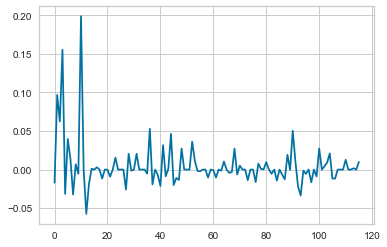

In [237]:
a= est.named_steps.elasticnetcv.coef_
plt.plot(a)

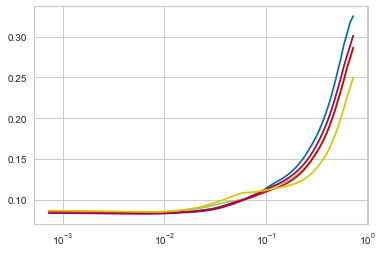

In [238]:

plt.plot(est.named_steps.elasticnetcv.alphas_, est.named_steps.elasticnetcv.mse_path_)
plt.xscale('log')

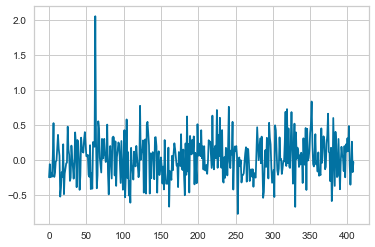

In [242]:


resid = np.array(y6_test).ravel() - est.predict(X6_test)
plt.plot(resid)


# np.argmax(resid)
# # np.argsort()

In [247]:
np.argmax(resid)


62

In [246]:
max(resid)

2.0551781346413973

In [244]:
np.argsort(resid)

array([253, 330, 161, 109, 379, 287, 102, 302,  15, 107, 182,  80,  20,
       130, 135, 145, 127, 188, 288, 345,  41,  99, 247, 154, 390,  56,
        58,  64,  16,  37, 173, 274, 383,  90, 404, 195, 159, 157, 327,
       152, 198, 158, 340,  96, 299, 234, 258, 380, 265, 377, 269, 108,
        28, 233, 164, 113, 141,  33,  84, 294, 137, 105, 236, 277,  29,
       397,   0,   2, 120,  18, 386,   7,  54, 300, 276,   4, 272, 181,
       387, 362,  42,  88, 239,  65, 259, 364, 148, 260,  53, 307, 184,
       270, 312, 163, 212,  21, 103, 261,   3,  79, 363, 275,  57, 156,
        70,   8,  17, 407, 360, 186, 395, 162, 112, 210, 121, 306, 166,
       209, 179, 301, 207, 221, 271, 370, 273, 313, 308, 149,  22, 178,
       243, 323, 218, 226, 231, 298, 405,  32, 371, 335, 291, 322, 153,
       355, 197, 116, 256, 176, 318, 151, 119, 171, 211,  69, 343, 289,
       111, 337, 403, 389, 358, 172,   1, 354,  98, 115, 342, 100,  23,
        95, 268, 284, 286,  83, 320, 175, 254, 366,  24,  81,  3

In [260]:
print(np.exp(y6_test[62:63]))
print(np.exp(y6_test[352:353]))
print(np.exp(y6_test[122:123]))
print(np.exp(y6_test[241:242]))
print(np.exp(y6_test[319:320]))
print(np.exp(y6_test[225:226]))
print(np.exp(y6_test[317:318]))
print(np.exp(y6_test[325:326]))
print(np.exp(y6_test[374:375]))
print(np.exp(y6_test[219:220]))


     host_response_rate  accommodates  bathrooms  bedrooms  number_of_reviews  \
670               100.0             4        1.0       1.0                 54   

     review_scores_rating  review_scores_location  review_scores_value  \
670                  94.0                    10.0                  9.0   

     instant_bookable_f  instant_bookable_t  \
670                   1                   0   

                     ...                   \
670                  ...                    

     neighbourhood_cleansed_VictoryHeights  neighbourhood_cleansed_ViewRidge  \
670                                      0                                 0   

     neighbourhood_cleansed_Wallingford  neighbourhood_cleansed_Wedgwood  \
670                                   0                                0   

     neighbourhood_cleansed_WestQueenAnne  \
670                                     0   

     neighbourhood_cleansed_WestWoodland  neighbourhood_cleansed_Westlake  \
670                 

In [84]:
#Ridge CV -- Log price train test result

degree = 1
est = make_pipeline(PolynomialFeatures(degree), RidgeCV())
est.fit(X_train, y_train)
# est.named_steps["est"]
ydata = est.named_steps.ridgecv.coef_

ypredict = est.predict(X_test)

print(mean_absolute_error(ypredict, y_test))
print(r2_score(ypredict, y_test))
print(est.named_steps.ridgecv)
print(ydata)

0.23011809568673966
0.6152464464887963
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
[[ 0.00000000e+00 -7.88094101e-04  0.00000000e+00  3.73807560e-02
   6.85434981e-02  1.37187073e-01 -1.42515408e-02  2.16610895e-03
   2.42868191e-02  1.29963472e-03 -1.16498588e-05 -7.78108799e-04
   6.60640013e-03  1.97004342e-02 -1.02875778e-02  1.14968757e-02
  -1.46179363e-02  2.47921034e-02 -5.69611713e-02  6.86961726e-03
  -6.86961726e-03  3.59547508e-02 -1.00260347e-01  3.18156399e-02
  -2.38988320e-02  5.63887881e-02  3.94067201e-01 -7.52195477e-03
  -3.86545246e-01 -4.69610267e-02  1.01220839e-01  0.00000000e+00
   9.41103164e-02  4.01697757e-02 -1.74761102e-01  7.67985983e-02
  -2.55945897e-02 -1.89932317e-01  3.42022200e-03  1.75625786e-01
  -3.14628486e-02  1.22605458e-02 -3.48941987e-02 -5.82015329e-02
   5.82015329e-02 -2.05551748e-02  8.43697494e-02 -2.52031199e-02
  -2.86392734e-02  1.99295280e-01 

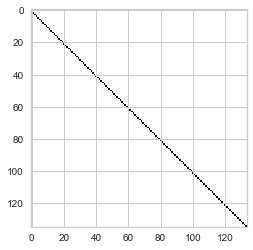

In [30]:
plt.imshow(est.named_steps.polynomialfeatures.powers_)

In [31]:
degree = 2
est = make_pipeline(PolynomialFeatures(degree), RidgeCV())
est.fit(X_train, y_train)
# est.named_steps["est"]
ydata = est.named_steps.ridgecv.coef_

ypredict = est.predict(X_test)

print(mean_absolute_error(ypredict, y_test))
print(r2_score(ypredict, y_test))
print(est.named_steps.ridgecv)

0.5568979194294275
-0.0016518733946075947
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)


In [32]:
#Getting even worse... don't need to run

# degree = 3
# est = make_pipeline(PolynomialFeatures(degree), RidgeCV())
# est.fit(X_train, y_train)
# # est.named_steps["est"]
# ydata = est.named_steps.ridgecv.coef_

# ypredict = est.predict(X_test)

# print(mean_absolute_error(ypredict, y_test))
# print(r2_score(ypredict, y_test))
# print(est.named_steps.ridgecv)

In [33]:
##### lasso

alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,0 , 1, 2, 3,4,5]
degree = 1
for alpha in alphas:
    est = make_pipeline(PolynomialFeatures(degree), LassoCV())

    est.fit(X_train, y_train)
    
    ypredict = est.predict(X_test)
    
mae = mean_absolute_error(ypredict, y_test)
rmse = sqrt(mae)

percentageofmean = float(rmse/listingdf2.log_price.mean())

print(mae)
print(rmse)
print(listingdf2.log_price.mean())
print(percentageofmean)

print(r2_score(ypredict, y_test))
print(est.named_steps.lassocv)


0.26288565382396084
0.5127237597614926
4.711149872034472
0.10883197811324925
0.3453421878662353
LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)


In [34]:
#X = listingdf2.iloc[:,:-3].as_matrix()
#y = listingdf2.iloc[:,-1:].as_matrix()

X = listingdf2.iloc[:,:-3]
y = listingdf2.iloc[:,-1:]



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size=0.2)

In [35]:
lr = LinearRegression()
lr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lr.coef_


array([[-6.63583395e-04, -7.11828974e-03,  3.78430753e-02,
         7.88893712e-02,  1.35918112e-01, -1.19345373e-02,
         2.02324359e-03,  2.25432820e-02,  1.48794998e-04,
        -1.88426992e-05, -6.72367184e-04,  6.79727440e-03,
         8.53513806e-03, -2.56079178e-03,  6.03222392e-03,
        -5.21772709e-03,  1.99562062e-02, -6.63535975e-02,
         1.23185896e-02, -1.23185896e-02,  3.25594264e-02,
        -8.51066712e-02,  2.97651680e-02, -4.92491990e-02,
         7.20312757e-02,  3.76893838e-01, -2.07184036e-02,
        -3.56175435e-01, -7.99403440e-02, -5.53363931e-03,
         7.95542232e-01,  7.94964915e-02, -1.32815111e-02,
        -2.19439909e-01,  1.12413732e-01, -6.83860333e-02,
        -4.91515403e-01, -2.50778329e-02,  1.39262844e-01,
        -8.44613543e-02, -2.50713450e-02, -1.14007926e-01,
        -5.84376494e-02,  5.84376494e-02,  2.28227772e-02,
         8.54128905e-02, -1.21721640e-01, -3.11146010e-02,
         2.32601221e-01, -3.72757917e-01,  4.17786703e-0

In [37]:
coefdf = pd.DataFrame({'colname':listingdf2.columns[:-3], 'value':lr.coef_[0]})
coefdf
#coefdf.sort_values(by=['value'])



,colname,value
0,host_response_rate,-0.000664
1,host_acceptance_rate,-0.007118
2,accommodates,0.037843
3,bathrooms,0.078889
4,bedrooms,0.135918
5,beds,-0.011935
6,cleaning_fee,0.002023
7,guests_included,0.022543
8,minimum_nights,0.000149
9,maximum_nights,-0.000019


In [38]:
##### ElasticNet

degree = 1

est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV())
est.fit(X_train, y_train)
ypredict = est.predict(X_test)

mae = mean_absolute_error(ypredict, y_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdf2.log_price.mean())

print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y_test))
print(est.named_steps.elasticnetcv)


0.2643706358327102
0.5141698511510668
0.10913892894878904
0.32245491284105043
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)


<function matplotlib.pyplot.show(*args, **kw)>

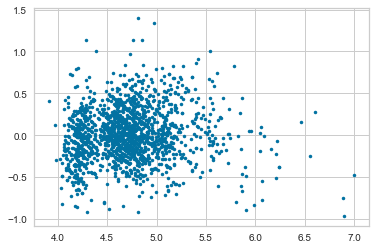

In [39]:
#Ploting ALL Features - train


# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X_train.as_matrix()), (y_train.as_matrix().flatten("F") - est.predict(X_train.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

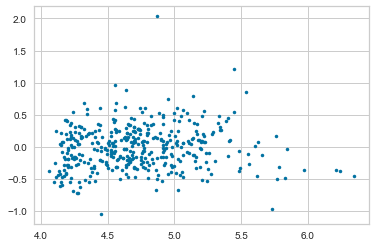

In [40]:
#Ploting ALL Features - X test

# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X_test.as_matrix()), (y_test.as_matrix().flatten("F") - est.predict(X_test.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

In [41]:

# list = []

# for column in X_train.columns:
#     list.append(column)
    
# list = "', '".join(list)
# print(list)


In [42]:
# coef005 = pd.read_csv('coefdf005.csv',"r",delimiter=',')
# coef005= coef005.drop(['Unnamed: 0'], axis = 1)
# coef005

In [43]:
coef005 = pd.read_csv('coefdf005.csv',"r",delimiter=',')
coef005= coef005.drop(['Unnamed: 0'], axis = 1)
list = []
for i in coef005['colname']:
    list.append(i)
    
list = "','".join(list)
print(list)

property_type_Boat','neighbourhood_cleansed_PioneerSquare','neighbourhood_cleansed_SunsetHill','room_type_Entirehome_apt','neighbourhood_cleansed_SouthLakeUnion','neighbourhood_cleansed_CentralBusinessDistrict','neighbourhood_cleansed_Pike_Market','neighbourhood_cleansed_LowerQueenAnne','neighbourhood_cleansed_YeslerTerrace','neighbourhood_cleansed_FirstHill','neighbourhood_cleansed_InternationalDistrict','neighbourhood_cleansed_Belltown','neighbourhood_cleansed_EastQueenAnne','neighbourhood_cleansed_PortageBay','neighbourhood_cleansed_SoutheastMagnolia','neighbourhood_cleansed_MadisonPark','neighbourhood_cleansed_WestQueenAnne','neighbourhood_cleansed_Broadway','property_type_Loft','bedrooms','neighbourhood_cleansed_NorthAdmiral','property_type_Chalet','neighbourhood_cleansed_Stevens','neighbourhood_cleansed_Laurelhurst','neighbourhood_cleansed_Fauntleroy','neighbourhood_cleansed_Westlake','neighbourhood_cleansed_Montlake','host_response_time_afewdaysormore','neighbourhood_cleansed_Gr

In [44]:
subset1 = ['log_price', 'property_type_Boat','neighbourhood_cleansed_PioneerSquare','neighbourhood_cleansed_SunsetHill','room_type_Entirehome_apt','neighbourhood_cleansed_SouthLakeUnion','neighbourhood_cleansed_CentralBusinessDistrict','neighbourhood_cleansed_Pike_Market','neighbourhood_cleansed_LowerQueenAnne','neighbourhood_cleansed_YeslerTerrace','neighbourhood_cleansed_FirstHill','neighbourhood_cleansed_InternationalDistrict','neighbourhood_cleansed_Belltown','neighbourhood_cleansed_EastQueenAnne','neighbourhood_cleansed_PortageBay','neighbourhood_cleansed_SoutheastMagnolia','neighbourhood_cleansed_MadisonPark','neighbourhood_cleansed_WestQueenAnne','neighbourhood_cleansed_Broadway','property_type_Loft','bedrooms','neighbourhood_cleansed_NorthAdmiral','property_type_Chalet','neighbourhood_cleansed_Stevens','neighbourhood_cleansed_Laurelhurst','neighbourhood_cleansed_Fauntleroy','neighbourhood_cleansed_Westlake','neighbourhood_cleansed_Montlake','host_response_time_afewdaysormore','neighbourhood_cleansed_GreenLake','neighbourhood_cleansed_CedarPark','neighbourhood_cleansed_Seaview','neighbourhood_cleansed_Alki','property_type_Bungalow','neighbourhood_cleansed_Minor','bathrooms','neighbourhood_cleansed_Fremont','bed_type_RealBed','neighbourhood_cleansed_Harrison_Denny_Blaine','host_is_superhost_t','neighbourhood_cleansed_NorthBeaconHill','host_is_superhost_f','neighbourhood_cleansed_Meadowbrook','neighbourhood_cleansed_Interbay','neighbourhood_cleansed_SouthPark','review_scores_value','property_type_Condominium','host_response_time_withinanhour','neighbourhood_cleansed_FairmountPark','neighbourhood_cleansed_Leschi','property_type_Apartment','neighbourhood_cleansed_Wedgwood','property_type_Other','bed_type_Couch','neighbourhood_cleansed_HighlandPark','neighbourhood_cleansed_Roosevelt','neighbourhood_cleansed_UniversityDistrict','neighbourhood_cleansed_MapleLeaf','neighbourhood_cleansed_Greenwood','property_type_Yurt','neighbourhood_cleansed_Riverview','neighbourhood_cleansed_PhinneyRidge','neighbourhood_cleansed_SewardPark','neighbourhood_cleansed_ArborHeights','neighbourhood_cleansed_CrownHill','neighbourhood_cleansed_Bryant','neighbourhood_cleansed_Pinehurst','neighbourhood_cleansed_ColumbiaCity','neighbourhood_cleansed_OlympicHills','neighbourhood_cleansed_NorthDelridge','neighbourhood_cleansed_Mid_BeaconHill','neighbourhood_cleansed_Ravenna','neighbourhood_cleansed_Dunlap','property_type_Camper_RV','neighbourhood_cleansed_SouthDelridge','neighbourhood_cleansed_RainierBeach','neighbourhood_cleansed_HighPoint','neighbourhood_cleansed_VictoryHeights','neighbourhood_cleansed_Brighton','neighbourhood_cleansed_SouthBeaconHill','room_type_Sharedroom','neighbourhood_cleansed_BitterLake','neighbourhood_cleansed_Broadview','property_type_Dorm']
                
listingdf3 = listingdf2[subset1]

X2 = listingdf3.iloc[:,1:]
y2 = listingdf3.iloc[:,:1]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 123, test_size=0.2)

In [45]:
##### ElasticNet

degree = 1

est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV())
est.fit(X2_train, y2_train)
ypredict = est.predict(X2_test)

mae = mean_absolute_error(ypredict, y2_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdf3.log_price.mean())

print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y2_test))
print(est.named_steps.elasticnetcv.alpha_)

print(est.named_steps.elasticnetcv)

0.23905676860071068
0.48893431931161335
0.10378237428062781
0.5682295807020199
0.0008969380448968342
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)


<function matplotlib.pyplot.show(*args, **kw)>

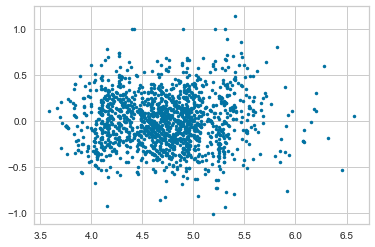

In [46]:
#Ploting ALL Features - train


# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X2_train.as_matrix()), (y2_train.as_matrix().flatten("F") - est.predict(X2_train.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

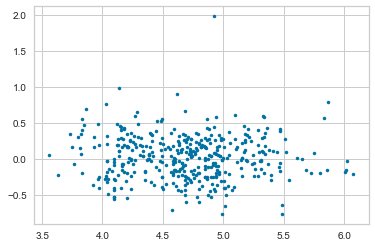

In [47]:
#Ploting ALL Features - X test

# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X2_test.as_matrix()), (y2_test.as_matrix().flatten("F") - est.predict(X2_test.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

In [48]:
second = pd.read_csv('second.csv',"r",delimiter=',')
second= second.drop(['Unnamed: 0'], axis = 1)
list = []
for i in second['colname']:
    list.append(i)
    
list = "','".join(list)
print(list)

property_type_Boat','neighbourhood_cleansed_PioneerSquare','neighbourhood_cleansed_SunsetHill','room_type_Entirehome_apt','neighbourhood_cleansed_SouthLakeUnion','neighbourhood_cleansed_CentralBusinessDistrict','neighbourhood_cleansed_Pike_Market','neighbourhood_cleansed_LowerQueenAnne','neighbourhood_cleansed_YeslerTerrace','neighbourhood_cleansed_FirstHill','neighbourhood_cleansed_InternationalDistrict','neighbourhood_cleansed_Belltown','neighbourhood_cleansed_EastQueenAnne','property_type_Loft','bedrooms','property_type_Chalet','host_response_time_afewdaysormore','property_type_Bungalow','bed_type_RealBed','host_is_superhost_t','host_is_superhost_f','review_scores_value','property_type_Condominium','host_response_time_withinanhour','property_type_Apartment','property_type_Other','bed_type_Couch','property_type_Yurt','property_type_Camper_RV','neighbourhood_cleansed_SouthDelridge','neighbourhood_cleansed_RainierBeach','neighbourhood_cleansed_HighPoint','neighbourhood_cleansed_Victory

In [49]:
subset2 = ['log_price', 'property_type_Boat','neighbourhood_cleansed_PioneerSquare','neighbourhood_cleansed_SunsetHill','room_type_Entirehome_apt','neighbourhood_cleansed_SouthLakeUnion','neighbourhood_cleansed_CentralBusinessDistrict','neighbourhood_cleansed_Pike_Market','neighbourhood_cleansed_LowerQueenAnne','neighbourhood_cleansed_YeslerTerrace','neighbourhood_cleansed_FirstHill','neighbourhood_cleansed_InternationalDistrict','neighbourhood_cleansed_Belltown','neighbourhood_cleansed_EastQueenAnne','property_type_Loft','bedrooms','property_type_Chalet','host_response_time_afewdaysormore','property_type_Bungalow','bed_type_RealBed','host_is_superhost_t','host_is_superhost_f','review_scores_value','property_type_Condominium','host_response_time_withinanhour','property_type_Apartment','property_type_Other','bed_type_Couch','property_type_Yurt','property_type_Camper_RV','neighbourhood_cleansed_SouthDelridge','neighbourhood_cleansed_RainierBeach','neighbourhood_cleansed_HighPoint','neighbourhood_cleansed_VictoryHeights','neighbourhood_cleansed_Brighton','neighbourhood_cleansed_SouthBeaconHill','room_type_Sharedroom','neighbourhood_cleansed_BitterLake','neighbourhood_cleansed_Broadview','property_type_Dorm']
                
listingdf4 = listingdf2[subset2]

X3 = listingdf4.iloc[:,1:]
y3 = listingdf4.iloc[:,:1]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state = 123, test_size=0.2)

In [50]:
##### ElasticNet

degree = 1

est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV())
est.fit(X3_train, y3_train)
ypredict = est.predict(X3_test)

mae = mean_absolute_error(ypredict, y3_test)
rmse = sqrt(mae)
percentageofmean = float(rmse/listingdf4.log_price.mean())

print(mae)
print(rmse)
print(percentageofmean)
print(r2_score(ypredict, y3_test))
print(est.named_steps.elasticnetcv.alpha_)

print(est.named_steps.elasticnetcv)

0.25424596301853986
0.5042280863047395
0.10702866603710755
0.4649134907183454
0.0005901253401970288
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)


<function matplotlib.pyplot.show(*args, **kw)>

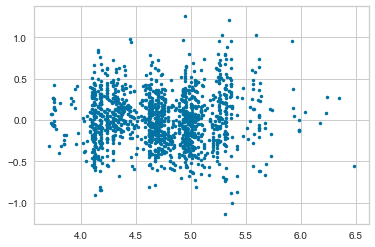

In [51]:
#Ploting ALL Features - train


# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X3_train.as_matrix()), (y3_train.as_matrix().flatten("F") - est.predict(X3_train.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

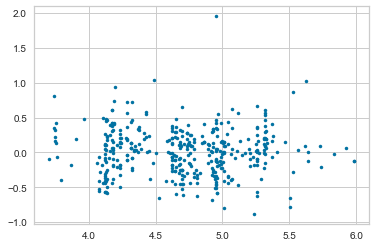

In [52]:
#Ploting ALL Features - X test

# plt.plot(X_train, est.predict(X_train), label = 'alpha = 1')

plt.plot(est.predict(X3_test.as_matrix()), (y3_test.as_matrix().flatten("F") - est.predict(X3_test.as_matrix()).flatten("F")),'.',label = 'alpha = 1')

plt.show

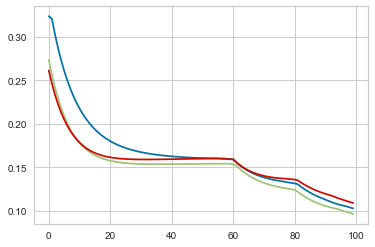

In [53]:
##### ElasticNet

degree = 1

est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV())
est.fit(X_train, y_train)
ypredict = est.predict(X_test)


mse = est.named_steps.elasticnetcv.mse_path_
mse

plt.plot(mse)



# rmse = sqrt(mae)
# percentageofmean = float(rmse/listingdf2.log_price.mean())

# print(mae)
# print(rmse)
# print(percentageofmean)
# print(r2_score(ypredict, y_test))
# print(est.named_steps.elasticnetcv)


In [54]:
#Ploting some of the Features

X_test_temp = X_test.loc[:,['host_response_rate']]

plt.plot(est.predict(X_test_temp.as_matrix()), (y_test.as_matrix() - est.predict(X_test_temp.as_matrix())),'.',label = 'alpha = 1')

plt.show

ValueError: X shape does not match training shape

In [ ]:
est.named_steps.resid.plot(style='o', figsize=(12,8));